In [1]:
import numpy as np 
import pandas as pd
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pyvis
from community import community_louvain

pd.set_option('display.max_columns', 30)  
pd.set_option('display.max_rows', 30)     
pd.set_option('display.width', None)        
pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_excel("UNAIR - GRAPH.xlsx")
df.head()

,debitor_name,debitor_bank,sender_recipient_name,sender_recipient_bank,amount_tx_idr,trx,type
0,N1,B1,N4929,B2,4.240722e+08,1,INCOMING
1,N2,B1,N4930,B3,1.200000e+09,1,INCOMING
2,N3,B1,N4931,B4,5.000000e+08,1,INCOMING
3,N4,B1,N2411,B5,5.500000e+09,1,INCOMING
4,N5,B1,N5,B4,1.250000e+08,1,INCOMING


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9401 entries, 0 to 9400
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   debitor_name           9401 non-null   object 
 1   debitor_bank           9401 non-null   object 
 2   sender_recipient_name  9401 non-null   object 
 3   sender_recipient_bank  9401 non-null   object 
 4   amount_tx_idr          9401 non-null   float64
 5   trx                    9401 non-null   int64  
 6   type                   9401 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 514.2+ KB


In [ ]:
total_baris = len(df)
unik_baris = len(df.drop_duplicates())
jumlah_duplikat = total_baris - unik_baris

print(f"Total baris: {total_baris}")
print(f"Baris unik: {unik_baris}")
print(f"Jumlah duplikat: {jumlah_duplikat}")

df = df.drop_duplicates()
df

Total baris: 9401
Baris unik: 8831
Jumlah duplikat: 570


,debitor_name,debitor_bank,sender_recipient_name,sender_recipient_bank,amount_tx_idr,trx,type
0,N1,B1,N4929,B2,4.240722e+08,1,INCOMING
1,N2,B1,N4930,B3,1.200000e+09,1,INCOMING
2,N3,B1,N4931,B4,5.000000e+08,1,INCOMING
3,N4,B1,N2411,B5,5.500000e+09,1,INCOMING
4,N5,B1,N5,B4,1.250000e+08,1,INCOMING
...,...,...,...,...,...,...,...
9396,N3040,B1,N7394,B106,1.201600e+09,1,OUTGOING
9397,N4925,B1,N4925,B4,1.500000e+09,1,OUTGOING
9398,N4926,B1,N9397,B7,5.000000e+08,1,OUTGOING
9399,N4927,B1,N4927,B14,1.600000e+09,4,OUTGOING


In [5]:
df.describe()

,amount_tx_idr,trx
count,8.831000e+03,8831.000000
mean,9.309827e+09,1.934549
std,1.074200e+11,2.795202
min,3.000000e-02,1.000000
25%,3.628897e+08,1.000000
50%,1.023000e+09,1.000000
75%,3.150000e+09,2.000000
max,8.690000e+12,62.000000


In [6]:
for column in df.columns:
    print(f"Kolom: {column}")
    print("Unique Values:")
    print(df[column].unique())  
    print("\n" + "-"*50 + "\n")  

Kolom: debitor_name
Unique Values:
['N1' 'N2' 'N3' ... 'N4926' 'N4927' 'N4928']

--------------------------------------------------

Kolom: debitor_bank
Unique Values:
['B1']

--------------------------------------------------

Kolom: sender_recipient_name
Unique Values:
['N4929' 'N4930' 'N4931' ... 'N4925' 'N9397' 'N4927']

--------------------------------------------------

Kolom: sender_recipient_bank
Unique Values:
['B2' 'B3' 'B4' 'B5' 'B6' 'B7' 'B8' 'B9' 'B10' 'B11' 'B12' 'B13' 'B14'
 'B15' 'B16' 'B17' 'B18' 'B19' 'B20' 'B21' 'B22' 'B23' 'B24' 'B25' 'B26'
 'B27' 'B28' 'B29' 'B30' 'B31' 'B32' 'B33' 'B34' 'B35' 'B36' 'B37' 'B38'
 'B39' 'B40' 'B41' 'B42' 'B43' 'B44' 'B45' 'B46' 'B47' 'B48' 'B49' 'B50'
 'B51' 'B52' 'B53' 'B54' 'B55' 'B56' 'B57' 'B58' 'B59' 'B60' 'B61' 'B62'
 'B63' 'B64' 'B65' 'B66' 'B67' 'B68' 'B69' 'B70' 'B71' 'B72' 'B73' 'B74'
 'B75' 'B76' 'B77' 'B78' 'B79' 'B80' 'B81' 'B82' 'B83' 'B84' 'B85' 'B86'
 'B87' 'B88' 'B89' 'B90' 'B91' 'B92' 'B93' 'B94' 'B95' 'B96' 'B97' '

**debitor_name**: Nama entitas nasabah Maybank.
Semua nasabah yang terdata pada debitor_name melakukan transaksi dengan menggunakan bank Maybank (kode bank B1).

**debitor_bank**: Nama bank yang digunakan oleh debitor_name untuk melakukan transaksi. Selalu berisi B1 (kode bank Maybank).

**sender_recipient_name**: Nama entitas nasabah bank, yang melakukan kegiatan transaksi dengan debitor_name.
Bisa menggunakan bank Maybank (B1), ataupun bank lain. Bisa saja bertransaksi ke diri sendiri, baik menggunakan bank yang sama atau tidak.

**sender_recipient_bank**: Nama bank yang digunakan oleh sender_recipient_name untuk melakukan transaksi. 

**amount_tx_idr**: Jumlah transaksi yang dilakukan antar dua entitas.

**trx**: Frekuensi transaksi yang dilakukan antar dua entitas.

**type**: Tipe transaksi yang dilakukan (incoming/ongoing). Perspektif incoming selalu dilihat dari debitor. Intinya:
_Incoming_ -> debitor menerima, sender_recipient
_Outgoing_ -> debitor memberi, sender_recipient menerima

### Metrik

**In-Degree & Out-Degree:**
In-Degree: Jumlah transaksi masuk ke suatu node.
Out-Degree: Jumlah transaksi keluar dari suatu node.

Interpretasi:
* Node dengan in-degree tinggi (sering menerima uang) penting untuk retensi (misal: nasabah yang menjadi tujuan dana).
* Node dengan out-degree tinggi (sering mengirim uang) perlu dipantau untuk retensi risiko churn (jika mengirim ke bank lain).

**Betweenness Centrality:**
Mengukur seberapa sering node menjadi jalur terpendek antar node lain.

Interpretasi:
* Node dengan betweenness tinggi adalah "jembatan" antar cluster. Target akuisisi jika node tersebut di bank lain.

**PageRank:**
Mengukur pengaruh node berdasarkan koneksi ke node penting.

Interpretasi:
* Node dengan PageRank tinggi adalah "hub" yang mempengaruhi banyak transaksi. Prioritas retensi.

**Bobot Transaksi (Amount & Frekuensi):**
Hitung total amount_tx_idr dan trx untuk setiap edge.

Interpretasi:

* Node dengan transaksi besar/frekuensi tinggi adalah high-value customer.



In [7]:
# Standardisasi penamaan: gabungkan nama+bank jadi satu key unik
df['debitor_id'] = df['debitor_name'].str.strip() + '|' + df['debitor_bank']
df['sender_id'] = df['sender_recipient_name'].str.strip() + '|' + df['sender_recipient_bank']

In [8]:
G = nx.DiGraph()

for _, row in df.iterrows():
    src, dst = None, None
    if row['type'] == 'INCOMING':
        src = row['sender_id']
        dst = row['debitor_id']
    else:  # OUTGOING
        src = row['debitor_id']
        dst = row['sender_id']
    
    # Inisialisasi edge jika belum ada
    if not G.has_edge(src, dst):
        G.add_edge(src, dst, weight_amount=0.0, weight_trx=0)
    # Tambah bobot
    G[src][dst]['weight_amount'] += row['amount_tx_idr']
    G[src][dst]['weight_trx'] += row['trx']

In [9]:
import networkx as nx
import pandas as pd

# --- 1. Hitung centrality metrics per kategori ---

# Degree (unweighted)
in_deg = dict(G.in_degree())
out_deg = dict(G.out_degree())

# Weighted Degree
in_amt = dict(G.in_degree(weight='weight_amount'))
out_amt = dict(G.out_degree(weight='weight_amount'))
in_trx = dict(G.in_degree(weight='weight_trx'))
out_trx = dict(G.out_degree(weight='weight_trx'))

# Centrality (unweighted)
betw_unw = nx.betweenness_centrality(G, normalized=True)
closeness_unw = nx.closeness_centrality(G)
pagerank_unw = nx.pagerank(G)

# Centrality (amount weighted)
betw_amt = nx.betweenness_centrality(G, weight='weight_amount', normalized=True)
closeness_amt = nx.closeness_centrality(G, distance=lambda u, v, edata: 1.0 / edata['weight_amount'] if edata['weight_amount'] != 0 else 1.0)
pagerank_amt = nx.pagerank(G, weight='weight_amount')

# Centrality (trx weighted)
betw_trx = nx.betweenness_centrality(G, weight='weight_trx', normalized=True)
closeness_trx = nx.closeness_centrality(G, distance=lambda u, v, edata: 1.0 / edata['weight_trx'] if edata['weight_trx'] != 0 else 1.0)
pagerank_trx = nx.pagerank(G, weight='weight_trx')

# --- 2. Kompilasi ke DataFrame ---

nodes = list(G.nodes())

df_metric = pd.DataFrame({
    'node': nodes,

    # Unweighted metrics
    'unw_in_deg': [in_deg.get(n, 0) for n in nodes],
    'unw_out_deg': [out_deg.get(n, 0) for n in nodes],
    'unw_betweenness': [betw_unw.get(n, 0) for n in nodes],
    'unw_closeness': [closeness_unw.get(n, 0) for n in nodes],
    'unw_pagerank': [pagerank_unw.get(n, 0) for n in nodes],

    # Transaction-weighted metrics
    'trx_in_deg': [in_trx.get(n, 0) for n in nodes],
    'trx_out_deg': [out_trx.get(n, 0) for n in nodes],
    'trx_betweenness': [betw_trx.get(n, 0) for n in nodes],
    'trx_closeness': [closeness_trx.get(n, 0) for n in nodes],
    'trx_pagerank': [pagerank_trx.get(n, 0) for n in nodes],

    # Amount-weighted metrics
    'amt_in_deg': [in_amt.get(n, 0.0) for n in nodes],
    'amt_out_deg': [out_amt.get(n, 0.0) for n in nodes],
    'amt_betweenness': [betw_amt.get(n, 0.0) for n in nodes],
    'amt_closeness': [closeness_amt.get(n, 0.0) for n in nodes],
    'amt_pagerank': [pagerank_amt.get(n, 0.0) for n in nodes],
})

# --- 3. Tampilkan hasil ---
df_metric.head()


,node,unw_in_deg,unw_out_deg,unw_betweenness,unw_closeness,unw_pagerank,trx_in_deg,trx_out_deg,trx_betweenness,trx_closeness,trx_pagerank,amt_in_deg,amt_out_deg,amt_betweenness,amt_closeness,amt_pagerank
0,N4929|B2,0,1,0.0,0.00000,0.000049,0,1,0.0,0.00000,0.000049,0.000000e+00,4.240722e+08,0.0,0.000000,0.000049
1,N1|B1,1,0,0.0,0.00008,0.000091,1,0,0.0,0.00008,0.000091,4.240722e+08,0.000000e+00,0.0,33844.548563,0.000091
2,N4930|B3,0,1,0.0,0.00000,0.000049,0,1,0.0,0.00000,0.000049,0.000000e+00,1.200000e+09,0.0,0.000000,0.000049
3,N2|B1,1,0,0.0,0.00008,0.000091,1,0,0.0,0.00008,0.000091,1.200000e+09,0.000000e+00,0.0,95770.151636,0.000091
4,N4931|B4,0,1,0.0,0.00000,0.000049,0,1,0.0,0.00000,0.000049,0.000000e+00,5.000000e+08,0.0,0.000000,0.000049


In [10]:
df_metric

,node,unw_in_deg,unw_out_deg,unw_betweenness,unw_closeness,unw_pagerank,trx_in_deg,trx_out_deg,trx_betweenness,trx_closeness,trx_pagerank,amt_in_deg,amt_out_deg,amt_betweenness,amt_closeness,amt_pagerank
0,N4929|B2,0,1,0.0,0.00000,0.000049,0,1,0.0,0.000000,0.000049,0.000000e+00,4.240722e+08,0.0,0.000000,0.000049
1,N1|B1,1,0,0.0,0.00008,0.000091,1,0,0.0,0.000080,0.000091,4.240722e+08,0.000000e+00,0.0,33844.548563,0.000091
2,N4930|B3,0,1,0.0,0.00000,0.000049,0,1,0.0,0.000000,0.000049,0.000000e+00,1.200000e+09,0.0,0.000000,0.000049
3,N2|B1,1,0,0.0,0.00008,0.000091,1,0,0.0,0.000080,0.000091,1.200000e+09,0.000000e+00,0.0,95770.151636,0.000091
4,N4931|B4,0,1,0.0,0.00000,0.000049,0,1,0.0,0.000000,0.000049,0.000000e+00,5.000000e+08,0.0,0.000000,0.000049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12526,N4926|B1,0,1,0.0,0.00000,0.000049,0,1,0.0,0.000000,0.000049,0.000000e+00,5.000000e+08,0.0,0.000000,0.000049
12527,N9397|B7,1,0,0.0,0.00008,0.000091,1,0,0.0,0.000080,0.000091,5.000000e+08,0.000000e+00,0.0,39904.229848,0.000091
12528,N4927|B1,0,1,0.0,0.00000,0.000049,0,4,0.0,0.000000,0.000049,0.000000e+00,1.600000e+09,0.0,0.000000,0.000049
12529,N4927|B14,1,0,0.0,0.00008,0.000091,4,0,0.0,0.000319,0.000091,1.600000e+09,0.000000e+00,0.0,127693.535515,0.000091


In [11]:
from sklearn.preprocessing import MinMaxScaler
df_metric2 = df_metric.copy()
to_normalize = [
    'unw_in_deg', 'unw_out_deg',
    'trx_in_deg', 'trx_out_deg',
    'amt_in_deg', 'amt_out_deg',
    'unw_closeness', 'trx_closeness', 'amt_closeness',
    'unw_betweenness', 'trx_betweenness', 'amt_betweenness',
    'unw_pagerank', 'trx_pagerank', 'amt_pagerank'
]

scaler = MinMaxScaler()
df_metric2[to_normalize] = scaler.fit_transform(df_metric[to_normalize])


In [12]:
df_metric2

,node,unw_in_deg,unw_out_deg,unw_betweenness,unw_closeness,unw_pagerank,trx_in_deg,trx_out_deg,trx_betweenness,trx_closeness,trx_pagerank,amt_in_deg,amt_out_deg,amt_betweenness,amt_closeness,amt_pagerank
0,N4929|B2,0.000000,0.011765,0.0,0.000000,0.000000,0.000000,0.005102,0.0,0.000000,0.000000,0.000000,0.000049,0.0,0.000000,0.000000
1,N1|B1,0.018519,0.000000,0.0,0.018814,0.020436,0.005618,0.000000,0.0,0.011903,0.020012,0.000049,0.000000,0.0,0.000049,0.019662
2,N4930|B3,0.000000,0.011765,0.0,0.000000,0.000000,0.000000,0.005102,0.0,0.000000,0.000000,0.000000,0.000138,0.0,0.000000,0.000000
3,N2|B1,0.018519,0.000000,0.0,0.018814,0.020436,0.005618,0.000000,0.0,0.011903,0.020012,0.000138,0.000000,0.0,0.000138,0.019662
4,N4931|B4,0.000000,0.011765,0.0,0.000000,0.000000,0.000000,0.005102,0.0,0.000000,0.000000,0.000000,0.000058,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12526,N4926|B1,0.000000,0.011765,0.0,0.000000,0.000000,0.000000,0.005102,0.0,0.000000,0.000000,0.000000,0.000058,0.0,0.000000,0.000000
12527,N9397|B7,0.018519,0.000000,0.0,0.018814,0.020436,0.005618,0.000000,0.0,0.011903,0.020012,0.000058,0.000000,0.0,0.000058,0.019662
12528,N4927|B1,0.000000,0.011765,0.0,0.000000,0.000000,0.000000,0.020408,0.0,0.000000,0.000000,0.000000,0.000184,0.0,0.000000,0.000000
12529,N4927|B14,0.018519,0.000000,0.0,0.018814,0.020436,0.022472,0.000000,0.0,0.047611,0.020012,0.000184,0.000000,0.0,0.000184,0.019662


In [ ]:
df_metric.to_csv('df_metric.csv', index=False)

In [24]:
df_metric2.to_csv('df_metric2.csv', index=False)

### Ranking Berdasarkan Score Composite (Pakai Sensitivity Anlysis)

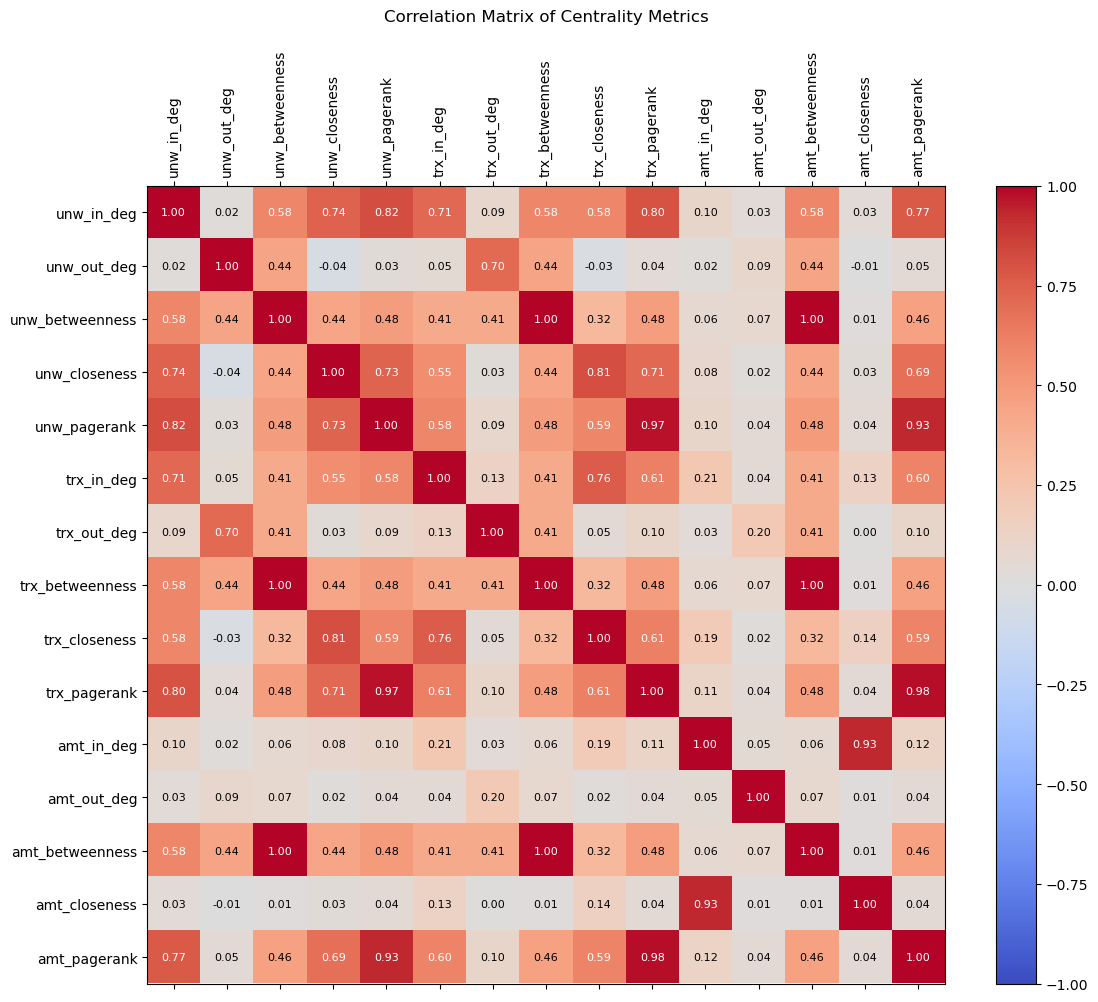

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Daftar kolom metrik
cols_to_check = [
    'unw_in_deg', 'unw_out_deg', 'unw_betweenness', 'unw_closeness', 'unw_pagerank',
    'trx_in_deg', 'trx_out_deg', 'trx_betweenness', 'trx_closeness', 'trx_pagerank',
    'amt_in_deg', 'amt_out_deg', 'amt_betweenness', 'amt_closeness', 'amt_pagerank'
]

# Hitung matriks korelasi
corr_matrix = df_metric2[cols_to_check].corr()

# Visualisasi heatmap korelasi
fig, ax = plt.subplots(figsize=(12, 10))
cax = ax.matshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)

# Set label sumbu
ax.set_xticks(range(len(cols_to_check)))
ax.set_yticks(range(len(cols_to_check)))
ax.set_xticklabels(cols_to_check, rotation=90)
ax.set_yticklabels(cols_to_check)

# Tambahkan nilai korelasi pada setiap sel
for i in range(len(cols_to_check)):
    for j in range(len(cols_to_check)):
        value = corr_matrix.iloc[i, j]
        color = 'white' if abs(value) > 0.5 else 'black'
        ax.text(j, i, f"{value:.2f}", ha='center', va='center', color=color, fontsize=8)

plt.title("Correlation Matrix of Centrality Metrics", pad=20)
plt.tight_layout()
plt.show()


yang berkorelasi bisa pilih salah satu saja

#### Berdasarka Nominal

In [ ]:
# --- Fungsi untuk sensitivity analysis ---
def core_candidates(df, metrics, k=20, n_samples=100, seed=42, thresh=0.8):
    rng = np.random.RandomState(seed)
    freq = pd.Series(0, index=df['node'].values, dtype=int)

    for _ in range(n_samples):
        w = rng.rand(len(metrics))
        w = w / w.sum()

        # Hitung skor gabungan dari kombinasi metrik
        score = sum(df[m] * w_i for m, w_i in zip(metrics, w))
        rank = score.rank(ascending=False, method='min')
        idx_topk = rank.nsmallest(k).index
        nodes_topk = df.loc[idx_topk, 'node'].values
        freq.loc[nodes_topk] += 1

    # Normalisasi dan ambil node yang sering muncul di top-k
    freq = freq / n_samples
    return freq[freq >= thresh].sort_values(ascending=False)

# --- Ekstrak kode bank dari node (misal: N1234|B1 jadi B1) ---
df_metric2['bank'] = df_metric2['node'].str.split('|').str[1]

# --- Definisikan metrik untuk retensi dan akuisisi ---
ret_mets = ['amt_in_deg', 'amt_betweenness', 'amt_pagerank']
aqs_mets = ['amt_out_deg', 'amt_closeness']

# --- Subset: nasabah milik B1 (retensi) dan non-B1 (potensial akuisisi) ---
df_ret = df_metric2[df_metric2['bank'] == 'B1'].copy()
df_aq  = df_metric2[df_metric2['bank'] != 'B1'].copy()

# --- Identifikasi semua user ID yang sudah punya akun di B1 ---
user_id_b1 = df_ret['node'].str.split('|').str[0].unique()

# --- Buang dari calon akuisisi siapa pun yang user-nya sudah punya akun di B1 ---
df_aq['user_id'] = df_aq['node'].str.split('|').str[0]
df_aq_filtered = df_aq[~df_aq['user_id'].isin(user_id_b1)].copy()

# --- Jalankan sensitivity analysis ---
core_ret = core_candidates(df_ret, ret_mets, k=20, n_samples=200, seed=0, thresh=0.8)
core_aq  = core_candidates(df_aq_filtered, aqs_mets, k=20, n_samples=200, seed=0, thresh=0.7)

# --- Output hasil ---
print("Core Retention (B1):", core_ret.head(20))

print("\nCore Acquisition (non-B1, filtered):", core_aq.head(20))


Core Retention (B1): N377|B1     1.000
N876|B1     1.000
N884|B1     1.000
N1093|B1    1.000
N1428|B1    1.000
N942|B1     0.995
N1153|B1    0.990
N2546|B1    0.990
N826|B1     0.955
N2075|B1    0.950
N2618|B1    0.910
N1933|B1    0.890
N540|B1     0.885
N1161|B1    0.840
dtype: float64

Core Acquisition (non-B1, filtered): N8308|B106    0.990
N7090|B14     0.970
N6153|B93     0.970
N6754|B4      0.970
N6058|B86     0.970
N6912|B37     0.965
N6196|B4      0.960
N6744|B4      0.940
N8852|B89     0.910
N6934|B4      0.910
N9170|B89     0.905
N8129|B106    0.890
N7601|B108    0.865
N6057|B14     0.855
N6381|B4      0.845
N7896|B7      0.840
N6225|B28     0.730
dtype: float64


#### Berdasarka frekuensi

In [22]:
# --- Pilih metrik, coba-coba 3 ---
ret_mets = ['trx_in_deg', 'trx_betweenness', 'trx_pagerank']
aqs_mets = ['trx_out_deg','trx_closeness']

# --- Fungsi untuk sensitivity analysis ---
def core_candidates(df, metrics, k=20, n_samples=100, seed=42, thresh=0.8):
    rng = np.random.RandomState(seed)
    freq = pd.Series(0, index=df['node'].values, dtype=int)

    for _ in range(n_samples):
        w = rng.rand(len(metrics))
        w = w / w.sum()

        # Hitung skor gabungan dari kombinasi metrik
        score = sum(df[m] * w_i for m, w_i in zip(metrics, w))
        rank = score.rank(ascending=False, method='min')
        idx_topk = rank.nsmallest(k).index
        nodes_topk = df.loc[idx_topk, 'node'].values
        freq.loc[nodes_topk] += 1

    # Normalisasi dan ambil node yang sering muncul di top-k
    freq = freq / n_samples
    return freq[freq >= thresh].sort_values(ascending=False)

# --- Ekstrak kode bank dari node (misal: N1234|B1 jadi B1) ---
df_metric2['bank'] = df_metric2['node'].str.split('|').str[1]

# --- Subset: nasabah milik B1 (retensi) dan non-B1 (potensial akuisisi) ---
df_ret = df_metric2[df_metric2['bank'] == 'B1'].copy()
df_aq  = df_metric2[df_metric2['bank'] != 'B1'].copy()

# --- Identifikasi semua user ID yang sudah punya akun di B1 ---
user_id_b1 = df_ret['node'].str.split('|').str[0].unique()

# --- Buang dari calon akuisisi siapa pun yang user-nya sudah punya akun di B1 ---
df_aq['user_id'] = df_aq['node'].str.split('|').str[0]
df_aq_filtered = df_aq[~df_aq['user_id'].isin(user_id_b1)].copy()

# --- Jalankan sensitivity analysis ---
core_ret = core_candidates(df_ret, ret_mets, k=20, n_samples=200, seed=0, thresh=0.8)
core_aq  = core_candidates(df_aq_filtered, aqs_mets, k=20, n_samples=200, seed=0, thresh=0.7)

# --- Output hasil ---
print("Core Retention (B1):", core_ret.head(20))

print("\nCore Acquisition (non-B1, filtered):", core_aq.head(20))


Core Retention (B1): N377|B1     1.000
N876|B1     1.000
N884|B1     1.000
N942|B1     1.000
N1093|B1    1.000
N1153|B1    1.000
N1428|B1    1.000
N600|B1     0.960
N2618|B1    0.945
N2102|B1    0.935
N1933|B1    0.925
N2075|B1    0.895
N540|B1     0.885
N2546|B1    0.875
N1161|B1    0.815
dtype: float64

Core Acquisition (non-B1, filtered): N8539|B50    0.925
N8374|B4     0.915
N5900|B3     0.910
N8852|B89    0.910
N8076|B4     0.890
N5406|B16    0.890
N8077|B9     0.880
N8075|B29    0.860
N8540|B6     0.860
N8541|B3     0.860
N5799|B14    0.855
N8196|B18    0.855
N8079|B8     0.830
N8198|B3     0.830
N5070|B36    0.775
N9092|B28    0.710
dtype: float64


#### tampa pembobotan

In [25]:
# --- Pilih metrik, coba-coba 3 ---
ret_mets = ['unw_in_deg', 'unw_betweenness', 'unw_pagerank']
aqs_mets = ['unw_out_deg','unw_closeness']

# --- Fungsi untuk sensitivity analysis ---
def core_candidates(df, metrics, k=20, n_samples=100, seed=42, thresh=0.8):
    rng = np.random.RandomState(seed)
    freq = pd.Series(0, index=df['node'].values, dtype=int)

    for _ in range(n_samples):
        w = rng.rand(len(metrics))
        w = w / w.sum()

        # Hitung skor gabungan dari kombinasi metrik
        score = sum(df[m] * w_i for m, w_i in zip(metrics, w))
        rank = score.rank(ascending=False, method='min')
        idx_topk = rank.nsmallest(k).index
        nodes_topk = df.loc[idx_topk, 'node'].values
        freq.loc[nodes_topk] += 1

    # Normalisasi dan ambil node yang sering muncul di top-k
    freq = freq / n_samples
    return freq[freq >= thresh].sort_values(ascending=False)

# --- Ekstrak kode bank dari node (misal: N1234|B1 jadi B1) ---
df_metric2['bank'] = df_metric2['node'].str.split('|').str[1]

# --- Subset: nasabah milik B1 (retensi) dan non-B1 (potensial akuisisi) ---
df_ret = df_metric2[df_metric2['bank'] == 'B1'].copy()
df_aq  = df_metric2[df_metric2['bank'] != 'B1'].copy()

# --- Identifikasi semua user ID yang sudah punya akun di B1 ---
user_id_b1 = df_ret['node'].str.split('|').str[0].unique()

# --- Buang dari calon akuisisi siapa pun yang user-nya sudah punya akun di B1 ---
df_aq['user_id'] = df_aq['node'].str.split('|').str[0]
df_aq_filtered = df_aq[~df_aq['user_id'].isin(user_id_b1)].copy()

# --- Jalankan sensitivity analysis ---
core_ret = core_candidates(df_ret, ret_mets, k=20, n_samples=200, seed=0, thresh=0.7)
core_aq  = core_candidates(df_aq_filtered, aqs_mets, k=20, n_samples=200, seed=0, thresh=0.7)

# --- Output hasil ---
print("Core Retention (B1):", core_ret.head(20))

print("\nCore Acquisition (non-B1, filtered):", core_aq.head(20))

Core Retention (B1): N1153|B1    1.000
N1428|B1    1.000
N2546|B1    1.000
N876|B1     1.000
N884|B1     1.000
N942|B1     1.000
N1093|B1    1.000
N377|B1     1.000
N2618|B1    0.995
N1933|B1    0.995
N182|B1     0.995
N2075|B1    0.970
N825|B1     0.940
N600|B1     0.915
N540|B1     0.870
N2102|B1    0.855
N1161|B1    0.800
N2627|B1    0.770
dtype: float64

Core Acquisition (non-B1, filtered): N5900|B3     0.955
N8374|B4     0.935
N5799|B14    0.935
N8539|B50    0.925
N8540|B6     0.920
N8541|B3     0.915
N8079|B8     0.910
N8076|B4     0.905
N8075|B29    0.905
N8078|B8     0.890
N8077|B9     0.890
N5406|B16    0.890
N9092|B28    0.870
N9093|B3     0.860
N9094|B14    0.860
N9095|B11    0.850
N9096|B3     0.840
N9097|B8     0.840
N5175|B24    0.825
dtype: float64


## Sensitivity Analysis untuk Prioritas Retensi & Akuisisi

### 1. Tujuan
- **Mengukur Robustness**: Seberapa konsisten peringkat Top-20 nasabah ketika bobot metrik berubah-ubah.  
- **Menemukan Core Candidates**: Siapa saja yang **selalu** masuk daftar Top-20 (≥ 80% simulasi), tanpa perlu menetapkan bobot bisnis secara eksplisit.

### 2. Metode

1. **Pilih Metrik Spesifik**  
   - **Retensi**:  
     - `in_amt` (total incoming amount)  
     - `betweenness` (posisi “jembatan” dalam jaringan)  
     - `pagerank` (kualitas koneksi ke node penting)  
   - **Akuisisi**:  
     - `out_amt` (total outgoing amount)  
     - `out_deg` (jumlah penerima unik)  
     - `closeness` (kecepatan reach network)

2. **Normalisasi**  
   Setiap metrik `min–max scaling` ke rentang [0, 1] agar semua punya skala sama.

3. **Sampling Bobot Acak**  
   Lakukan _n_ simulasi (misal 200) dengan membuat bobot acak (sum=1) hanya untuk metrik yang relevan.

4. **Hitung Composite Score & Ranking**  
   - Skor = ∑ (metrik × bobot)  
   - Urutkan nasabah berdasarkan skor (descending), ambil Top-20.

5. **Hitung Frekuensi Kemunculan**  
   Untuk setiap simulasi, catat siapa saja yang masuk Top-20.  
   Core Score = (jumlah kemunculan) / (jumlah simulasi).

6. **Core Candidates**  
   Nasabah dengan Core Score ≥ 0.8 dianggap **robust** dan masuk daftar prioritas.

### 3. Hasil
- Nilai di samping `Core Retention`/`Core Acquisition` adalah **proporsi** kemunculan di Top-20.  
  - `1.000` → selalu muncul di 100% simulasi.  
  - `0.94` → muncul di 94% simulasi.
- Dengan cara ini, kita **tidak perlu** menentukan “in_amt 50% + betweenness 30% + pagerank 20%” di awal—cukup lihat siapa yang paling konsisten.

---

## Alasan Pemilihan 3 Metrik

| Tujuan   | Metrik        | Alasan                                                                 |
| -------- | ------------- | ---------------------------------------------------------------------- |
| **Retensi**    | `in_amt`      | Volume uang masuk → proxy langsung revenue yang perlu dijaga.        |
|            | `betweenness` | Posisi jembatan → dampak gangguan jaringan jika nasabah ini hilang.    |
|            | `pagerank`    | Kualitas koneksi → terhubung ke entitas penting lainnya.               |
| **Akuisisi**   | `out_amt`     | Volume uang keluar → indikasi potensi cross-sell.                     |
|            | `out_deg`     | Jumlah penerima unik → seberapa luas mereka membangun relasi.         |
|            | `closeness`   | Kecepatan reach network → efisiensi menjangkau nasabah baru.          |

- **Minim Redundansi**:  
  Setelah uji korelasi, tiga metrik ini terbukti memberikan informasi unik tanpa banyak tumpang tindih.  
- **Relevansi Bisnis**:  
  Masing-masing langsung menggambarkan aspek kunci (revenue vs. network position vs. reachability) sesuai tujuan retensi atau akuisisi.